### Problem Statement

##### Enable the telemarketing team to prioritize targeting for the term loan marketing program by adopting a data-driven approach for improved efficiency and conversion rates.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df=pd.read_csv("bank_term_loan.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
target              int32
dtype: object

How many term depositers are there in the data?

In [7]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In the absence of ML, what is the success rate?

In [ ]:
df['target'] = np.where(df['y'].isin(['yes']),1,0)
df['target'].mean().round(2)
#Event rate is 11%. 
# We do not have to balace this case as we have sufficient Event rate to diff between success VS failure. 
# if not balanced  use "SMOTE" (1%<) to perform Over_sampling or Under_sampling

0.11

Without any ML intervention, the telemarketing team currently achieves an 11% success rate. This project aims to evaluate how much improvement an ML model can bring in optimizing customer targeting and increasing conversion rates.

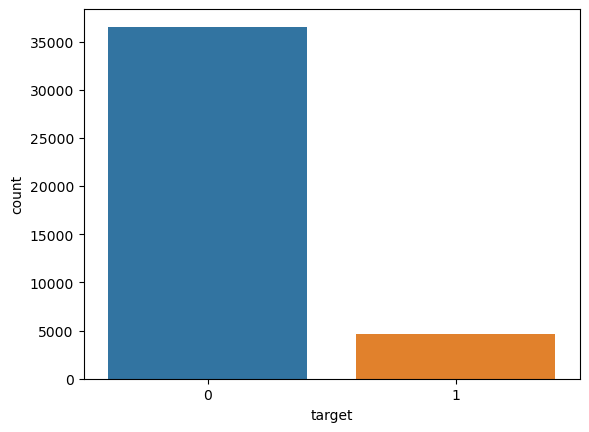

In [9]:
import seaborn as sns
sns.countplot(x='target', data=df)
plt.show()

In [23]:
# #Correlation Heatmap
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Feature Correlation Heatmap")
# plt.show()

In [25]:
# # distribution of job types, marital status, and education
# for col in ['job', 'marital', 'education']:
#     plt.figure(figsize=(8,4))
#     sns.countplot(y=df[col], order=df[col].value_counts().index)
#     plt.title(f"Distribution of {col}")
#     plt.show()

In [27]:
# #Relationship between categorical features and target variable
# for col in ['job', 'marital', 'education']:
#     plt.figure(figsize=(8,4))
#     sns.barplot(x=df[col], y=df['y'].apply(lambda x: 1 if x=='yes' else 0))
#     plt.xticks(rotation=45)
#     plt.title(f"Proportion of 'yes' in {col}")
#     plt.show()


In [ ]:
# # Continuous numeric columns from the dataset
# num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
#             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# # Plot histograms & boxplots for numeric columns
# for col in num_cols:
#     fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
#     sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
#     axes[0].set_title(f"Distribution of {col}")

#     sns.boxplot(x=df[col], ax=axes[1])
#     axes[1].set_title(f"Boxplot of {col}")

#     plt.show()


In [19]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

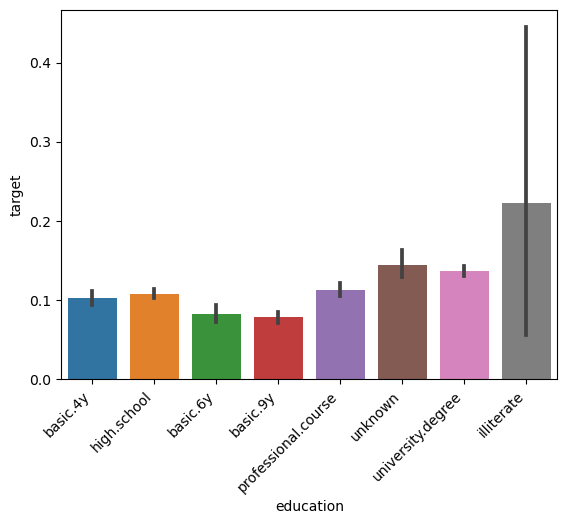

In [ ]:
#category wise probability of taking up a term loan
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)
plt.xticks(rotation=45, ha='right')
plt.show()
# There are counter intuitive issues in this variable. Because we can clearly see that Unknown and illiterate have a high probability of taking a 
# term loan but we don't want them to take a term loan

In [ ]:
# combining all the 3 basic edu category's into one and unknown and illiterate into another category
df['education']=np.where(df['education']=='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education']=='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education']=='basic.4y', 'Basic', df['education'])
df['education']=np.where(df['education']=='illiterate', 'unknown', df['education'])

In [32]:
df.groupby('education')['target'].mean()

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64

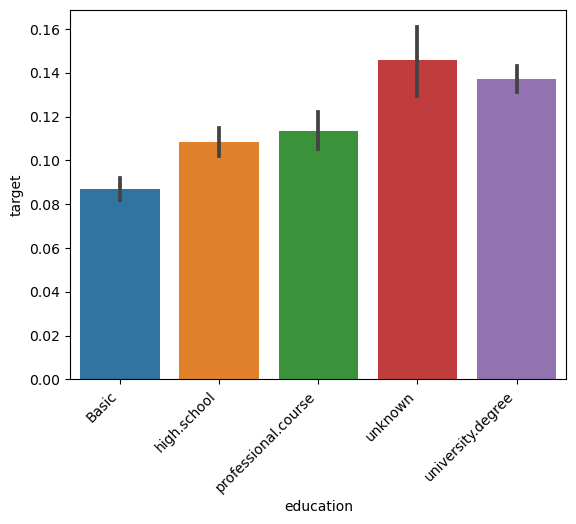

In [36]:
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)
plt.xticks(rotation=45, ha='right')
plt.show()

A variable helps explain variations in the dependent variable by defining a trend across the X-axis in a regression model.

If an independent variable creates a visible slope when compared to the dependent variable, it suggests a meaningful relationship and should be considered in the analysis.

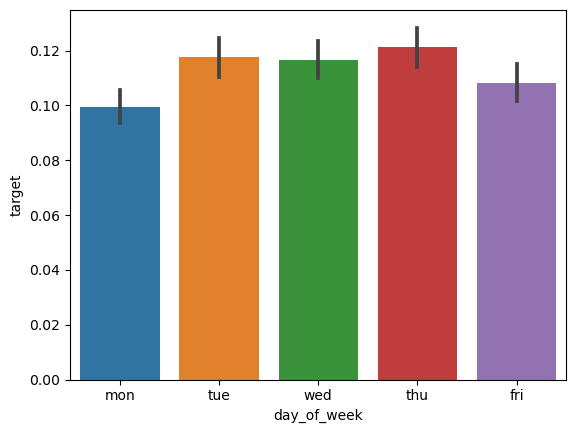

In [ ]:
ax=sns.barplot(x="day_of_week", y="target", data=df, estimator=mean)
# since there is no discrimination or solpe we can drop this variable
# (Drop day_of_week)

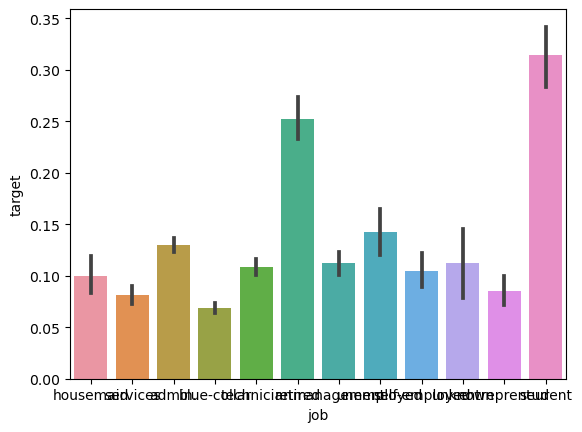

In [39]:
ax=sns.barplot(x="job", y="target", data=df, estimator=mean)

In [43]:
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64

In [46]:
df['job']=np.where(df['job']=='unknown', 'unemployed', df['job'])
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64

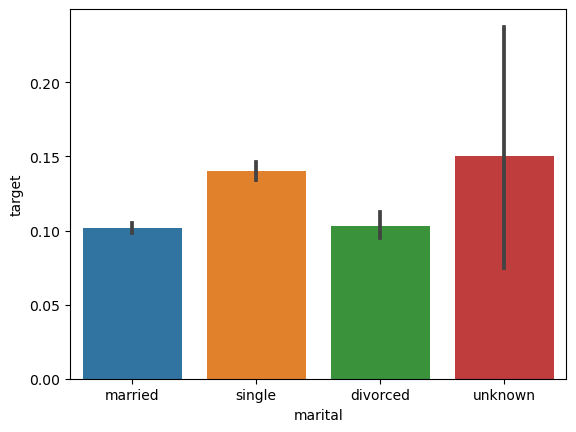

In [ ]:
ax=sns.barplot(x="marital", y="target", data=df, estimator=mean)
#not much difference in slope (can not find a trend)
#(Drop marital)

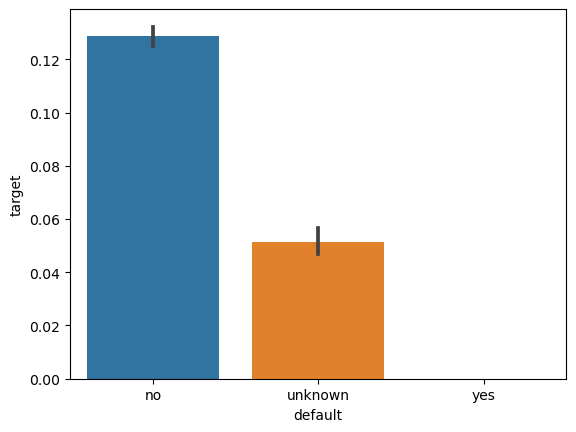

In [ ]:
ax=sns.barplot(x="default", y="target", data=df, estimator=mean)
#there clearly is a slop and discrimination but there is no data for ppl who have defaulted, whcih makes it a bad predictor
# (Drop default)

In [51]:
df.groupby('default')['target'].count()

default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64

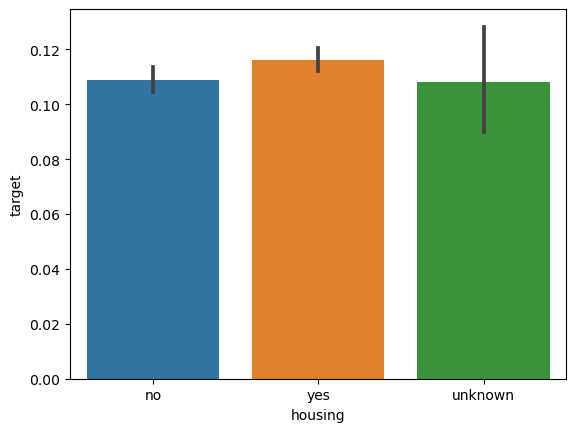

In [ ]:
ax=sns.barplot(x="housing", y="target", data=df, estimator=mean)
#No slope bad predictor (Drop housing)

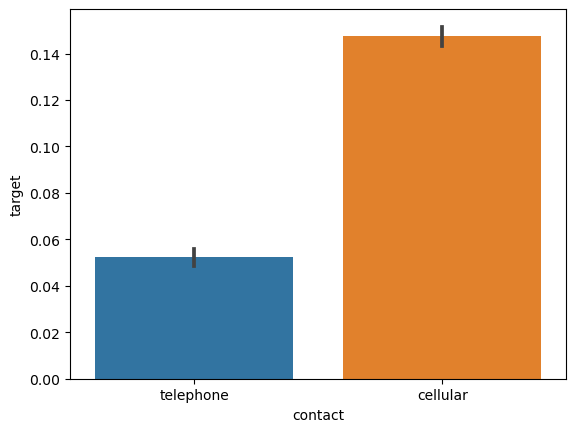

In [ ]:
ax=sns.barplot(x="contact", y="target", data=df, estimator=mean)
# Its a good indicator and has a slop
# Consider this variable

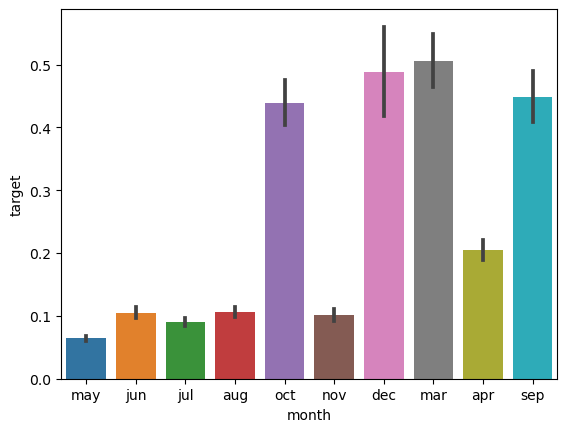

In [53]:
ax=sns.barplot(x="month", y="target", data=df, estimator=mean)

In [ ]:
# Transforming months in quatres
df['qtr'] = np.where(df['month'].isin(['jan', 'feb', 'mar']),'Q1',np.where(df['month'].isin(['apr', 'may', 'jun']), 'Q2',np.where(df['month'].isin(['jul', 'aug', 'sep']), 'Q3',np.where(df['month'].isin(['oct', 'nov', 'dec']), 'Q4',0))))
df['qtr'].value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: qtr, dtype: int64

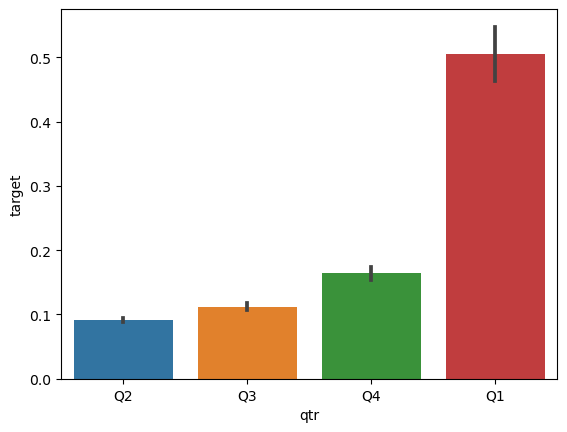

In [ ]:
ax=sns.barplot(x="qtr", y="target", data=df, estimator=mean)
# Consider this variable

In [ ]:
# What is the chance of customer accepting a term loan in different quatres
df.groupby('qtr')['target'].mean()
# we can see that there is a 50% chance of a customer accepting a term loan in Q1

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64

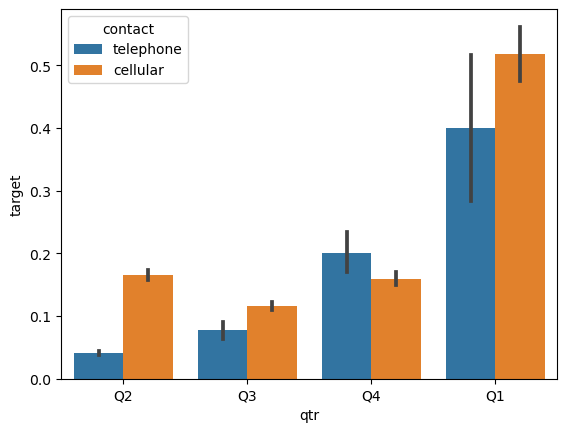

In [59]:
ax=sns.barplot(x="qtr", y="target", hue='contact',data=df, estimator=mean)

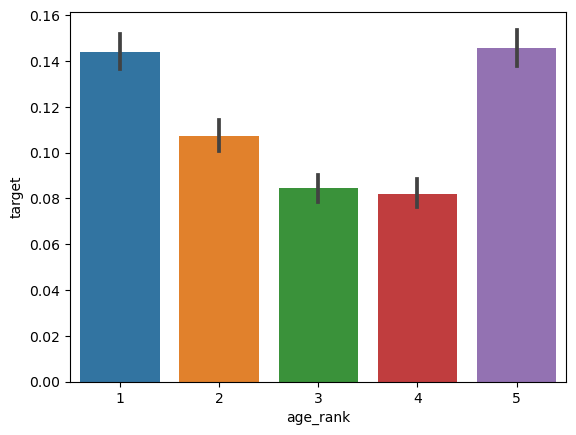

In [ ]:
# Here we are converting continues variables into categories and creating ranks to use them as categories
df['age_rank']=pd.qcut(df['age'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="age_rank", y="target", data=df, estimator=mean)
# this is giving a U shaped curve which might not be significant (we can consider this or we can also drop this)

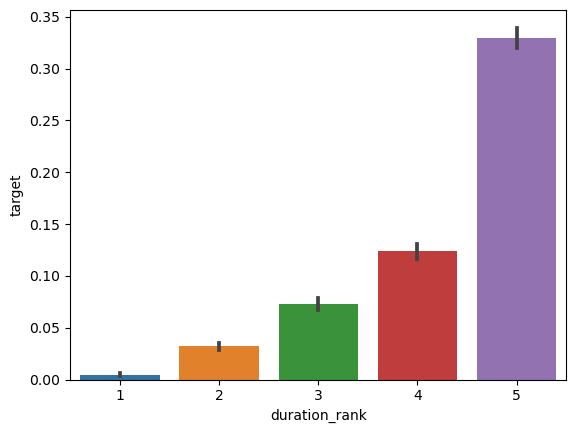

In [ ]:
# Again converting continues variables into categorical (using ranks)
df['duration_rank']=pd.qcut(df['duration'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="duration_rank", y="target", data=df, estimator=mean)
# as the duration increases beyond a point then the chance of term loan is high
# We can not use it because we dont know the duration of the call until its taken (drop this variable)

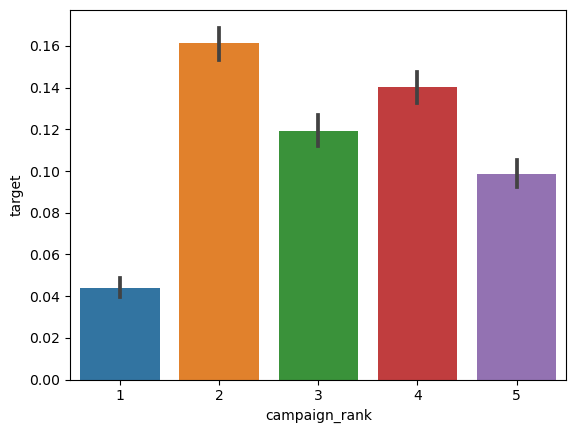

In [ ]:
# converting continues variables into categorical (using ranks)
df['campaign_rank']=pd.qcut(df['campaign'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="campaign_rank", y="target", data=df, estimator=mean)
# again not a strong slop because of no-linearity (we can consider this or we can also drop this)

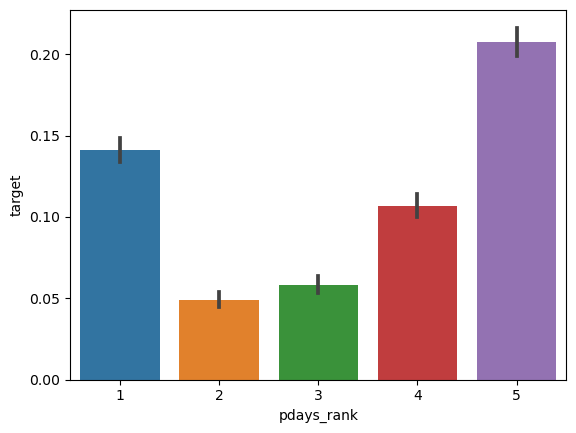

In [ ]:
# converting continues variables into categorical (using ranks)
df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)
# again not a strong slop because of no-linearity (we can consider this)

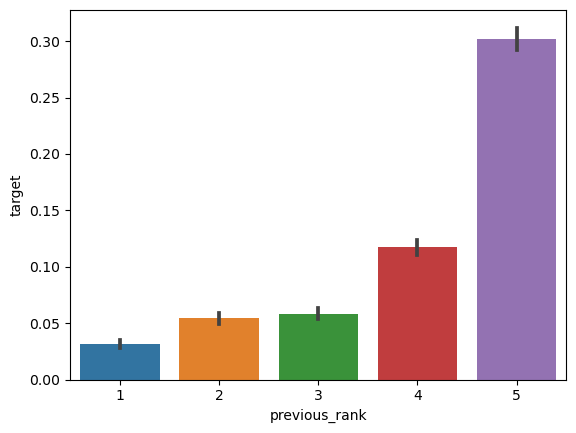

In [ ]:
# converting continues variables into categorical (using ranks)
df['previous_rank']=pd.qcut(df['previous'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="previous_rank", y="target", data=df, estimator=mean)
# again not a strong slop because of no-linearity (we can consider this variable)

In [ ]:
df['poutcome_new']=np.where(df['poutcome'].isin(['failure','nonexistent']),0,1) #0 for failure and nonexistent, 1 for success
df.groupby('poutcome_new')['target'].mean()
# The data is biased, with significantly fewer failure instances compared to the success rate, which could skew the mode if taken into account
# Drop this

poutcome_new
0    0.094085
1    0.651129
Name: target, dtype: float64

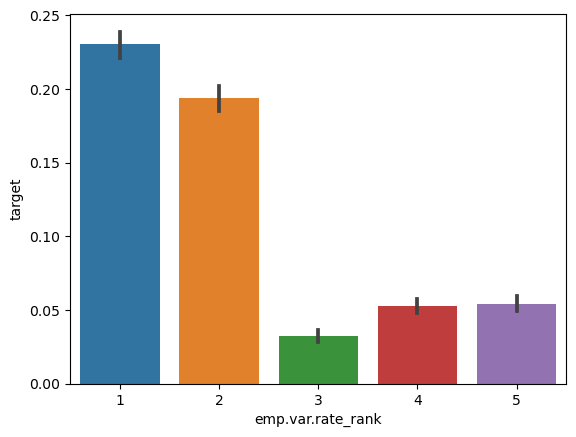

In [ ]:
# converting continues variables into categorical (using ranks)
df['emp.var.rate_rank']=pd.qcut(df['emp.var.rate'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="emp.var.rate_rank", y="target", data=df, estimator=mean)
# consider this variable

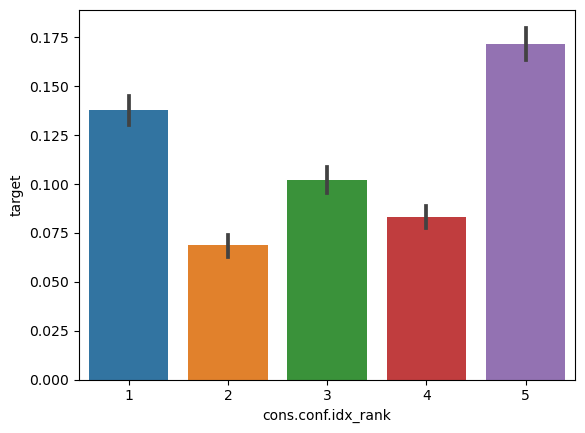

In [72]:
# converting continues variables into categorical (using ranks)
df['cons.conf.idx_rank']=pd.qcut(df['cons.conf.idx'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="cons.conf.idx_rank", y="target", data=df, estimator=mean)
# consider this variable

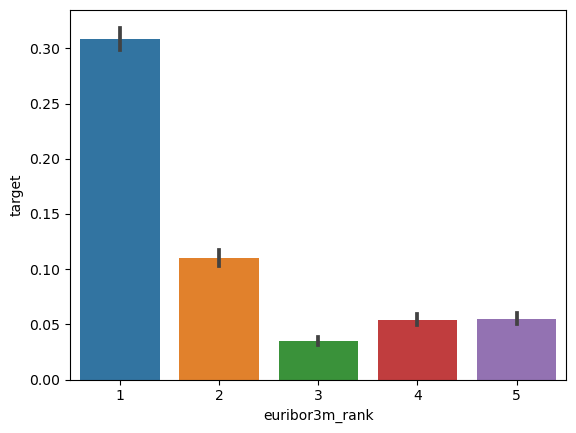

In [73]:
# converting continues variables into categorical (using ranks)
df['euribor3m_rank']=pd.qcut(df['euribor3m'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="euribor3m_rank", y="target", data=df, estimator=mean)
# consider this variable

In [74]:
col_num = ['pdays', 'emp.var.rate', 'euribor3m', 'nr.employed', 'previous', 'campaign', 'cons.conf.idx', 'emp.var.rate']
col_char=['qtr', 'education', 'job', 'contact']